# Week 09, Prep notebook

This week we'll focus on building visualizations with vega-lite and Altair in Python.

We'll learn how to include plots in 5 different ways:
1. saving JSON directly from the vega-editor
1. Copying vega-lite code from other sources (in our case Starboard) and using Altair to export it as JSON
1. Building dashboards with by combining vega-lite code from other sources with Altair layouts
1. Using Altair to make the plot with Python, with the data stored online
1. Using Python for the data cleaning/transformation and Altair just for plotting and saving as vega-lite JSON

## 1. Copy Vega-lite code directly to Altair

We can start with one of the example vega-lite plots from the [vega-editor](https://vega.github.io/editor/), for example one of the "stacked line chart" examples:

```javascript
{
  "$schema": "https://vega.github.io/schema/vega-lite/v5.json",
  "width": 300, "height": 200,
  "data": {"url": "data/unemployment-across-industries.json"},
  "mark": "area",
  "encoding": {
    "x": {
      "timeUnit": "yearmonth", "field": "date",
      "axis": {"format": "%Y"}
    },
    "y": {
      "aggregate": "sum", "field": "count"
    },
    "color": {
      "field": "series",
      "scale": {"scheme": "category20b"}
    }
  }
}
```

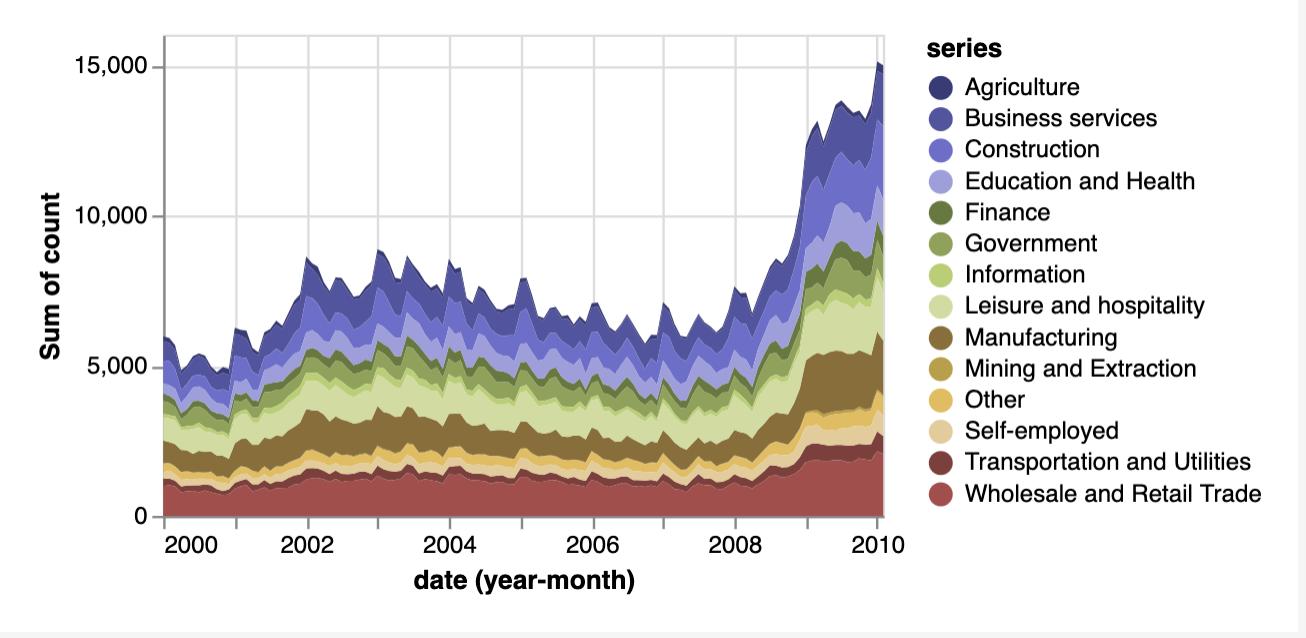

We could use this directly in a website through attaching it to a "div" element, OR we can figure out how to translate this to Altair in Python. 

Looking forward -- if we figure out how to use Altair in Python, we can use it to take data that we analyze with Python and make interactive visualizations with it.

In order to do this, we need to make sure that we give the full URL to the data, where is this?  So, if we google "vega lite datasets" this takes us to [this page](https://vega.github.io/vega-datasets/), which, after a bit of clicking around brings us to the [vega-datasets github page](https://github.com/vega/vega-datasets/tree/next/data) where all the data is stored.  

The data set used above has a raw link of [https://raw.githubusercontent.com/vega/vega-datasets/next/data/unemployment-across-industries.json](https://raw.githubusercontent.com/vega/vega-datasets/next/data/unemployment-across-industries.json) (make sure you click on the "Raw" button for any dataset), so we can add this full URL into the vega-editor call:

```javascript
{
  "$schema": "https://vega.github.io/schema/vega-lite/v5.json",
  "width": 300, "height": 200,
  "data": {"url": "https://raw.githubusercontent.com/vega/vega-datasets/next/data/unemployment-across-industries.json"},
  "mark": "area",
  "encoding": {
    "x": {
      "timeUnit": "yearmonth", "field": "date",
      "axis": {"format": "%Y"}
    },
    "y": {
      "aggregate": "sum", "field": "count"
    },
    "color": {
      "field": "series",
      "scale": {"scheme": "category20b"}
    }
  }
}
```

But how do we translate this into Altair?  Let's take a look at the `.from_dict` function:

In [53]:
import altair as alt

In [12]:
chart1 = alt.Chart.from_dict({
 # "$schema": "https://vega.github.io/schema/vega-lite/v5.json",
  "width": 300, "height": 200,
  "data": {"url": "https://raw.githubusercontent.com/vega/vega-datasets/next/data/unemployment-across-industries.json"},
  "mark": "area",
  "encoding": {
    "x": {
      "timeUnit": "yearmonth", "field": "date",
      "axis": {"format": "%Y"}
    },
    "y": {
      "aggregate": "sum", "field": "count"
    },
    "color": {
      "field": "series",
      "scale": {"scheme": "category20b"}
    }
  }
})
chart1

alt.Chart(...)

Note that I commented out the `schema` call above!

This is how we can get build from any of the vega-lite examples into an Altair plot.

## 2. Dashboard Building with Vega-lite and Altair

So, not everything translates easily between vega-lite and Altair.  In particular, selections in between plots can get a little tricky.  

In prior classes we started by translating our dashboard code from [a Starboard notebook](https://starboard.gg/jnaiman/inClass_week12_spring2022-nZa79A6), but now we are going to start "from scratch" by first making each plot here and then connecting them.


### The dataset

This week we'll make some plots with the Mobility dataset and then put them together in an interactive dashboard.

We'll use a dataset of USA "mobility" which (I *think* [comes from a a large census study from 1989-2015](https://www.census.gov/library/working-papers/2018/adrm/CES-WP-18-40R.html)) and is collected in several places [including right here](http://www.stat.cmu.edu/~cshalizi/uADA/15/hw/01/mobility.csv).  This measures the income mobility (i.e. how easy it is to go from a low-income to high-income household) as a function of various parameters (such as student-to-teacher ratio and city).

Note that if we were in the Data Storytelling class, we might be worried that this data includes some [Data Hazards](https://very-good-science.github.io/data-hazards/contents/data-hazards.html), but we won't go into detail about those now, just be aware of them!

Let's take a quick look at this dataset:



In [13]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/UIUC-iSchool-DataViz/is445_data/main/mobility.csv")
df

,ID,Name,Mobility,State,Population,Urban,Black,Seg_racial,Seg_income,Seg_poverty,...,Migration_out,Foreign_born,Social_capital,Religious,Violent_crime,Single_mothers,Divorced,Married,Longitude,Latitude
0,100,Johnson City,0.062199,TN,576081,1,0.021,0.090,0.035,0.030,...,0.005,0.012,-0.298,0.514,0.001,0.190,0.110,0.601,-82.436386,36.470371
1,200,Morristown,0.053652,TN,227816,1,0.020,0.093,0.026,0.028,...,0.014,0.023,-0.767,0.544,0.002,0.185,0.116,0.613,-83.407249,36.096539
2,301,Middlesborough,0.072635,TN,66708,0,0.015,0.064,0.024,0.015,...,0.012,0.007,-1.270,0.668,0.001,0.211,0.113,0.590,-83.535332,36.551540
3,302,Knoxville,0.056281,TN,727600,1,0.056,0.210,0.092,0.084,...,0.014,0.020,-0.222,0.602,0.001,0.206,0.114,0.575,-84.242790,35.952259
4,401,Winston-Salem,0.044801,NC,493180,1,0.174,0.262,0.072,0.061,...,0.019,0.053,-0.018,0.488,0.003,0.220,0.092,0.586,-80.505333,36.081276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
736,39205,John Day,0.115854,OR,7935,0,0.001,0.002,0.002,0.004,...,0.015,0.015,0.208,0.331,0.000,0.195,0.108,0.628,-118.531197,44.594025
737,39301,Friday Harbor,0.101695,WA,14077,0,0.002,0.010,0.012,0.022,...,0.021,0.060,2.716,0.171,0.000,0.219,0.148,0.604,-123.052956,48.525379
738,39302,Bellingham,0.115575,WA,166814,1,0.006,0.057,0.046,0.051,...,0.028,0.098,0.063,0.294,0.001,0.195,0.099,0.538,-121.263443,48.831154
739,39303,Port Angeles,0.085840,WA,90478,0,0.007,0.122,0.025,0.028,...,0.021,0.043,0.476,0.260,0.001,0.235,0.124,0.598,-123.544647,47.912067


For our dashboard, we're going to make two side-by-side plots with a "driver" plot on the left and a "response" plot on the right.

So, where are we going with this?  Well, what we want to do is have a rectangle plot on one side that "drives" a histogram based on selections on the left side such as:

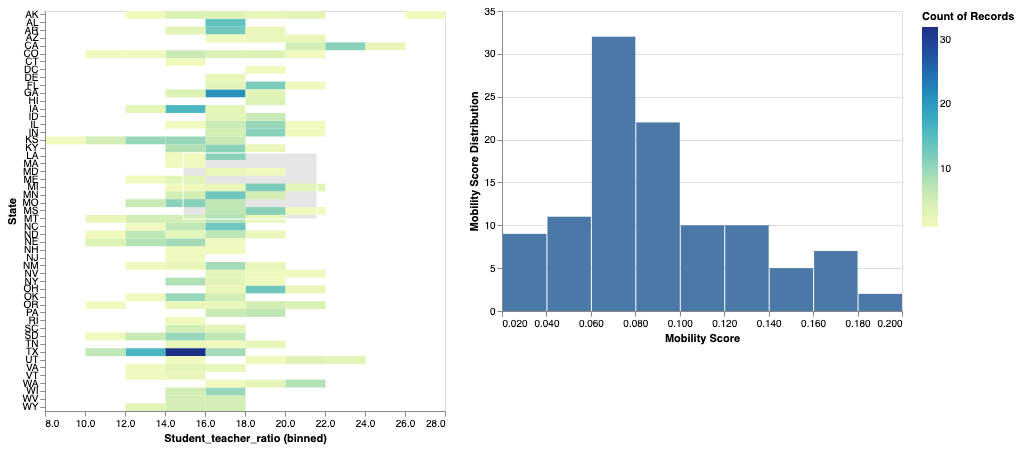

These two plots will look something like this on the left-plot:

<AxesSubplot:ylabel='Frequency'>

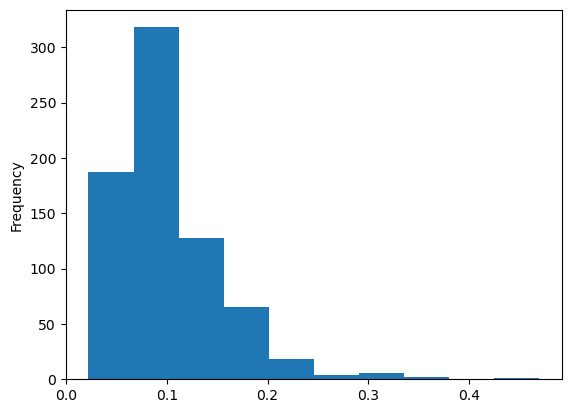

In [16]:
df['Mobility'].plot(kind='hist')

And something like this on the right-plot:

In [20]:
import numpy as np
bins = np.linspace(df['Student_teacher_ratio'].min(),df['Student_teacher_ratio'].max(), 10)
bins

array([ 9.6       , 11.61111111, 13.62222222, 15.63333333, 17.64444444,
       19.65555556, 21.66666667, 23.67777778, 25.68888889, 27.7       ])

In [22]:
table = df.pivot_table(index='State', columns=pd.cut(df['Student_teacher_ratio'], bins), aggfunc='size')
table

/var/folders/t7/bwcvd_4177q4872gxghn7p9r0000gq/T/ipykernel_47053/2457424171.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  table = df.pivot_table(index='State', columns=pd.cut(df['Student_teacher_ratio'], bins), aggfunc='size')


Student_teacher_ratio,"(9.6, 11.611]","(11.611, 13.622]","(13.622, 15.633]","(15.633, 17.644]","(17.644, 19.656]","(19.656, 21.667]","(21.667, 23.678]","(23.678, 25.689]","(25.689, 27.7]"
State,,,,,,,,,
AK,0,1,4,3,3,3,0,0,1
AL,0,0,0,11,3,0,0,0,0
AR,0,0,0,16,2,0,0,0,0
AZ,0,0,0,1,2,1,1,0,0
CA,0,0,0,0,0,5,11,2,0
CO,1,1,4,6,4,1,0,0,0
CT,0,0,1,0,0,0,0,0,0
DC,0,0,0,0,1,0,0,0,0
DE,0,0,0,1,1,0,0,0,0


In [25]:
table.index

Index(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI',
       'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN',
       'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH',
       'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA',
       'WI', 'WV', 'WY'],
      dtype='object', name='State')

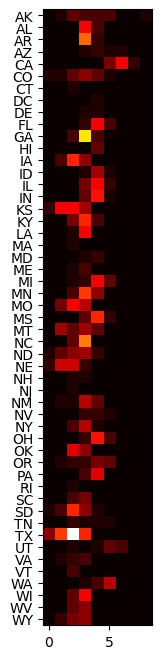

In [33]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=(10,8))
ax.imshow(table.values, cmap='hot', interpolation='nearest')
ax.set_yticks(range(len(table.index)))
ax.set_yticklabels(table.index)
plt.show()

### Rectangle plot

We'll now do this with vega-lite and move into Altair -- these will help us make these plots interactive and then host them on various webpages that we'll build.

Let's do one plot at a time, using some vega-lite notation for practice.  Let's plot the `Student_teacher_ratio` across each `State` using [vega-lites "rect"](https://vega.github.io/vega-lite/docs/rect.html) mark.

In [34]:
chart1 = alt.Chart.from_dict({
  # Data
  "data": {"url":"https://raw.githubusercontent.com/UIUC-iSchool-DataViz/is445_data/main/mobility.csv"},
  # Marks
  "mark":"rect",
  "height":400,
  # Encoding (note:error for encoding vs encodings)
  "encoding":{
    "x":{"field":"Student_teacher_ratio", "type":"quantitative"},
    "y":{"field":"State","type":"ordinal"},
    "color":{"aggregate":"count", "type":"quantitative"} 
    # will show the number of records with a specific student/teacher ratio in a particular state
  }
  
})
chart1

alt.Chart(...)

So, that is not quite right -- what is happening is there is just a few (at most 5) values of `Student_teacher_ratio`s are in a single `State`.  This makes sense since `Student_teacher_ratio` is a continuous quantitative variable:

In [35]:
df['Student_teacher_ratio']

0       NaN
1       NaN
2      15.1
3       NaN
4      15.4
       ... 
736    15.1
737    18.3
738    21.1
739    19.5
740    21.0
Name: Student_teacher_ratio, Length: 741, dtype: float64

To deal with this, lets bin it!

In [36]:
chart1 = alt.Chart.from_dict({
  # Data
  "data": {"url":"https://raw.githubusercontent.com/UIUC-iSchool-DataViz/is445_data/main/mobility.csv"},
  #// Marks
  "mark":"rect",
  "height":400,
  # Encoding (note:error for encoding vs encodings)
  "encoding":{
    "x":{"bin":{"maxbins":10}, "field":"Student_teacher_ratio", "type":"quantitative"},
    "y":{"field":"State","type":"ordinal"},
    "color":{"aggregate":"count", "type":"quantitative"} 
    # will show the number of records with a specific student/teacher ratio in a particular state
  }
  
})
chart1

alt.Chart(...)

### Histogram plot

Ultimately, we want to use this to "drive" changes in a histogram of `Mobility` scores such that if we select a range of `Student_teacher_ratio`'s and `State`'s we will then see our histogram update.  We need to make a histogram of `Mobility` scores for this to work!



In [37]:
chart2 = alt.Chart.from_dict({
  #// Data
  "data": {"url":"https://raw.githubusercontent.com/UIUC-iSchool-DataViz/is445_data/main/mobility.csv"},
  #// Mark
  "mark": "bar",
  #// Encoding
  "encoding":{
    "x":{"field":"Mobility", "type":"quantitative", "axis":{"title":"Mobility Score"}},
    "y":{"aggregate":"count","type":"quantitative", "axis":{"title":"Mobility Score Distribution"}}
  }
})
chart2

alt.Chart(...)

Again, this is not quite right because since `Mobility` is also quantitative and we need to bin it:

In [38]:
chart2 = alt.Chart.from_dict({
  #// Data
  "data": {"url":"https://raw.githubusercontent.com/UIUC-iSchool-DataViz/is445_data/main/mobility.csv"},
  #// Mark
  "mark": "bar",
  #// Encoding
  "encoding":{
    "x":{"field":"Mobility", "type":"quantitative", "bin":True, "axis":{"title":"Mobility Score"}},
    #//"x":{"field":"Mobility", "type":"quantitative", "axis":{"title":"Mobility Score"}},
    "y":{"aggregate":"count","type":"quantitative", "axis":{"title":"Mobility Score Distribution"}}
  }
})
chart2

alt.Chart(...)

### Dashboarding

The first thing we probably want to do is put these charts side-by-side.  We can do this with Altair's horizontal concatination function:

In [39]:
chart = alt.HConcatChart(hconcat=[chart1,chart2])
chart

alt.HConcatChart(...)

### Interactivity

Ok, so now we want to add a brush selection like before for the left-most plot that changes the values of the histograms on the right-most plot.  How to do this?  Well, first let's look at the brush selector in Altair:

In [40]:
brush = alt.selection_interval()  # selection of type "interval"

We can add this to our first plot and then see we have some interactivity:

In [42]:
chart1.add_params(
        brush
    )

alt.Chart(...)

So that didn't do much!  What are some of the parameters we can use in our brush selection?

In [43]:
alt.selection_interval?

Signature:
alt.selection_interval(
    name: Optional[str] = None,
    value: Union[Any, altair.utils.schemapi.UndefinedType] = Undefined,
    bind: Union[altair.vegalite.v5.schema.core.Binding, str, altair.utils.schemapi.UndefinedType] = Undefined,
    empty: Union[bool, altair.utils.schemapi.UndefinedType] = Undefined,
    expr: Union[str, altair.vegalite.v5.schema.core.Expr, altair.expr.core.Expression, altair.utils.schemapi.UndefinedType] = Undefined,
    encodings: Union[List[str], altair.utils.schemapi.UndefinedType] = Undefined,
    on: Union[str, altair.utils.schemapi.UndefinedType] = Undefined,
    clear: Union[str, bool, altair.utils.schemapi.UndefinedType] = Undefined,
    resolve: Union[Literal['global', 'union', 'intersect'], altair.utils.schemapi.UndefinedType] = Undefined,
    mark: Union[altair.vegalite.v5.schema.core.Mark, altair.utils.schemapi.UndefinedType] = Undefined,
    translate: Union[str, bool, altair.utils.schemapi.UndefinedType] = Undefined,
    zoom: Union[

One thing we note here is that there is potentially a `field` we can use for the selection which might make us think we want to use "Mobility" as the input but we actually now need to specify the encodings -- i.e. on what axis in our original plot are we selecting?

So, we are selecting boxes in `chart1` -- so this will be selecting on both x & y:

In [44]:
brush = alt.selection_interval(encodings=['x','y'])

Let's now add this brush to our `chart1`:

In [50]:
chart1 = alt.Chart.from_dict({
  "data": {"url":"https://raw.githubusercontent.com/UIUC-iSchool-DataViz/is445_data/main/mobility.csv"},
  "mark":"rect",
  "height":400,
  "encoding":{
    "x":{"bin":{"maxbins":10}, "field":"Student_teacher_ratio", "type":"quantitative"},
    "y":{"field":"State","type":"ordinal"},
    "color":{"aggregate":"count", "type":"quantitative"} 
  }  
}).add_params(
        brush
    )
#chart1

And now we can add this also as a [transform filter](https://altair-viz.github.io/user_guide/transform/filter.html) to our `chart2` plot:

In [64]:
chart2 = alt.Chart.from_dict({
  "data": {"url":"https://raw.githubusercontent.com/UIUC-iSchool-DataViz/is445_data/main/mobility.csv"},
  "mark": "bar",
  "encoding":{
    "x":{"field":"Mobility", "type":"quantitative", "bin":True, "axis":{"title":"Mobility Score"}},
    "y":{"aggregate":"count","type":"quantitative", "axis":{"title":"Mobility Score Distribution"}}
  }
}).transform_filter(
    brush
)

Now let's horizontally concatinate them, and let's do it in the fancy Altair way:

In [78]:
chart = chart1 | chart2

In [74]:
alt.renderers.enable('mimetype') # in case you have issues with the render

RendererRegistry.enable('mimetype')

In [83]:
chart

<VegaLite 5 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/display_frontends.html#troubleshooting


## 3. Use Altair to make the chart 

To build straight from Python, we need to read in the data first.  Before, we've been linking to online data, but the nice thing about Altair is that instead of doing data manipulations "on the fly" in vega-lite, we can potentially do them in Python and then save the modified data for our plot.

Before doing that though, let's see if we can translating from vega-lite style to "Altair-vega-lite style".  We can do this with our data still stored online at a url:

In [84]:
mobility_url = 'https://raw.githubusercontent.com/UIUC-iSchool-DataViz/is445_data/main/mobility.csv'

Let's once again re-write `chart1`, but now transforming from the dictionary we have been passing to more "original Altair" formatting and passing data through Python:

Before doing any complicated binning stuff, let's start with a simple scatter plot in "Altair style":

In [85]:
scatter1 = alt.Chart(mobility_url).mark_point().encode(
    x='Mobility:Q', # "Q for quantiative"
    y='Population:Q',
)
scatter1

<VegaLite 5 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/display_frontends.html#troubleshooting


Note here we used `Q` for quantitative which is one of the [Altair Encoding Data Types](https://altair-viz.github.io/altair-viz-v4/user_guide/encoding.html#encoding-data-types):

| Data Type | Shorthand Code | Description |
|-----------|----------------|-------------|
| quantitative | Q | a continuous real-valued quantity |
| ordinal | O | a discrete ordered quantity |
| nominal | N | a discrete unordered category |
| temporal | T | a time or date value |
| geojson | G | a geographic shape |

Also note that now we define what mark we are using, in this case `mark_point` after we define the "source" of the chart (in this case a URL).

Let's make this scatter plot a bit more complex by coloring by another quantitative variable, like `Income`:

In [86]:
scatter2 = alt.Chart(mobility_url).mark_point().encode(
    x='Mobility:Q', # "Q for quantiative"
    y='Population:Q',
    color=alt.Color('Income:Q')
)
scatter2

<VegaLite 5 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/display_frontends.html#troubleshooting


We can pick different color schemes in the same way that we use [Vega-lite colormaps](https://vega.github.io/vega/docs/schemes/#reference) and by specifying the scale for the color in Altair:

In [87]:
scatter3 = alt.Chart(mobility_url).mark_point().encode(
    x='Mobility:Q', # "Q for quantiative"
    y='Population:Q',
    color=alt.Color('Income:Q', scale=alt.Scale(scheme='viridis'))
)
scatter3

<VegaLite 5 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/display_frontends.html#troubleshooting


So, this is a bit more readable, however we still need to do a few things.  To practice binning, let's [bin our color](https://altair-viz.github.io/user_guide/transform/bin.html#bin-transforms) from our `Income` variable on the color bar and in our plot:

In [88]:
scatter4 = alt.Chart(mobility_url).mark_point().encode(
    x='Mobility:Q', # "Q for quantiative"
    y='Population:Q',
    color=alt.Color('Income:Q', scale=alt.Scale(scheme='viridis'),bin=alt.Bin(maxbins=5))
)
scatter4

<VegaLite 5 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/display_frontends.html#troubleshooting


For this, if we really want to highlight the bins, we probably want more hues, so let's change our colormap:

In [89]:
scatter5 = alt.Chart(mobility_url).mark_point().encode(
    x='Mobility:Q', # "Q for quantiative"
    y='Population:Q',
    color=alt.Color('Income:Q', scale=alt.Scale(scheme='sinebow'),bin=alt.Bin(maxbins=5))
)
scatter5

<VegaLite 5 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/display_frontends.html#troubleshooting


Groovy!  Also, it does look like we have a pretty big range in the `Population` parameter so maybe we want a log scale on our y-axis:

In [90]:
scatter6 = alt.Chart(mobility_url).mark_point().encode(
    x='Mobility:Q', # "Q for quantiative"
    #y='Population:Q',
    y=alt.Y('Population:Q', scale=alt.Scale(type='log')),
    color=alt.Color('Income:Q', scale=alt.Scale(scheme='sinebow'),bin=alt.Bin(maxbins=5))
)
scatter6

<VegaLite 5 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/display_frontends.html#troubleshooting


Now that we know a bit more about Altair-flavored vega-lite plots, let's try to remake our dashboard plot, but using only Altair-style.

Let's start with the first plot.

Our `from_dict` call looks like:

```javascript
chart1 = alt.Chart.from_dict({
  "data": {"url":"https://raw.githubusercontent.com/UIUC-iSchool-DataViz/is445_data/main/mobility.csv"},
  "mark":"rect",
  "height":400,
  "encoding":{
    "x":{"bin":{"maxbins":10}, "field":"Student_teacher_ratio", "type":"quantitative"},
    "y":{"field":"State","type":"ordinal"},
    "color":{"aggregate":"count", "type":"quantitative"} 
  }  
})
```

We can use the [`mark_rect` Altair encoding example](https://altair-viz.github.io/gallery/interactive_cross_highlight.html#interactive-chart-with-cross-highlight) to build this plot:

In [91]:
chart1 = alt.Chart(mobility_url).mark_rect().encode(
    alt.X("Student_teacher_ratio:Q", bin=alt.Bin(maxbins=10)),
    alt.Y("State:O"),
    alt.Color("count()")
).properties(
   height=400
)
chart1

<VegaLite 5 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/display_frontends.html#troubleshooting


Neat!  Let's also re-make our second chart.  For reference we had the following `from_dict` call:

```javascript
chart2 = alt.Chart.from_dict({
  "data": {"url":"https://raw.githubusercontent.com/UIUC-iSchool-DataViz/is445_data/main/mobility.csv"},
  "mark": "bar",
  "encoding":{
    "x":{"field":"Mobility", "type":"quantitative", "bin":True, "axis":{"title":"Mobility Score"}},
    "y":{"aggregate":"count","type":"quantitative", "axis":{"title":"Mobility Score Distribution"}}
  }
})
```

We can [bin using `mark_bar`](https://altair-viz.github.io/user_guide/transform/bin.html#bin-transforms).

In [92]:
chart2 = alt.Chart(mobility_url).mark_bar().encode(
    alt.X("Mobility:Q", bin=True,axis=alt.Axis(title='Mobility Score')),
    alt.Y('count()', axis=alt.Axis(title='Mobility Score Distribution'))
)
chart2

<VegaLite 5 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/display_frontends.html#troubleshooting


We can then put them side by side once more:

In [93]:
chart = (chart1.properties(width=300) | chart2.properties(width=300))

In [98]:
chart

<VegaLite 5 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/display_frontends.html#troubleshooting


Now, we can essentially use the code we used before to make these charts interactive with each other:

In [101]:
brush = alt.selection_interval(encodings=['x','y'])

chart1 = alt.Chart(mobility_url).mark_rect().encode(
    alt.X("Student_teacher_ratio:Q", bin=alt.Bin(maxbins=10)),
    alt.Y("State:O"),
    alt.Color("count()")
).properties(
   height=400
).add_params(
        brush
)

chart2 = alt.Chart(mobility_url).mark_bar().encode(
    alt.X("Mobility:Q", bin=True,axis=alt.Axis(title='Mobility Score')),
    alt.Y('count()', axis=alt.Axis(title='Mobility Score Distribution'))
).transform_filter(
    brush
)

chart = (chart1.properties(width=300) | chart2.properties(width=300))

chart

<VegaLite 5 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/display_frontends.html#troubleshooting


## 4. Python Analysis + Altair Plotting

The real "power" of Altair is that we can use it to (relatively) easily port data that is analyzed/cleaned in Python and then transform it into a format we can use in a Streamlit app or on a Jekyll webpage (more on that in a few weeks).  

Let's re-make our dashboard in one final way, which will leverage the fact that we can do data manipulations right here in Python and then "copy" that *transformed* data to a vega-lite plot.

Note: this means that we will be storing the data not online *but in the vega-lite/Altair specification*.  Keep this in mind when thinking about the size of your data/json file if we end up saving that specification.

Ok, the first thing we need is the data!  Let's use Pandas to load it:

In [102]:
import pandas as pd
import numpy as np

In [103]:
mobility = pd.read_csv('https://raw.githubusercontent.com/UIUC-iSchool-DataViz/is445_data/main/mobility.csv')

In [104]:
mobility.head()

,ID,Name,Mobility,State,Population,Urban,Black,Seg_racial,Seg_income,Seg_poverty,...,Migration_out,Foreign_born,Social_capital,Religious,Violent_crime,Single_mothers,Divorced,Married,Longitude,Latitude
0,100,Johnson City,0.062199,TN,576081,1,0.021,0.090,0.035,0.030,...,0.005,0.012,-0.298,0.514,0.001,0.190,0.110,0.601,-82.436386,36.470371
1,200,Morristown,0.053652,TN,227816,1,0.020,0.093,0.026,0.028,...,0.014,0.023,-0.767,0.544,0.002,0.185,0.116,0.613,-83.407249,36.096539
2,301,Middlesborough,0.072635,TN,66708,0,0.015,0.064,0.024,0.015,...,0.012,0.007,-1.270,0.668,0.001,0.211,0.113,0.590,-83.535332,36.551540
3,302,Knoxville,0.056281,TN,727600,1,0.056,0.210,0.092,0.084,...,0.014,0.020,-0.222,0.602,0.001,0.206,0.114,0.575,-84.242790,35.952259
4,401,Winston-Salem,0.044801,NC,493180,1,0.174,0.262,0.072,0.061,...,0.019,0.053,-0.018,0.488,0.003,0.220,0.092,0.586,-80.505333,36.081276


In [105]:
brush = alt.selection_interval(encodings=['x','y'])

chart1 = alt.Chart(mobility).mark_rect().encode(
    alt.X("Student_teacher_ratio:Q", bin=alt.Bin(maxbins=10)),
    alt.Y("State:O"),
    alt.Color("count()")
).properties(
   height=400
).add_params(
        brush
)

chart2 = alt.Chart(mobility_url).mark_bar().encode(
    alt.X("Mobility:Q", bin=True,axis=alt.Axis(title='Mobility Score')),
    alt.Y('count()', axis=alt.Axis(title='Mobility Score Distribution'))
).transform_filter(
    brush
)

chart = (chart1.properties(width=300) | chart2.properties(width=300))

chart

<VegaLite 5 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/display_frontends.html#troubleshooting


So, this looks basically identical to what we had above!  This is because it basically is, however when we save the visualization, it will contain all of the data as well.

This won't really affect us now, but it is something that we'll keep in mind as we go forward.